In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [52]:
df=pd.read_csv('AB_NYC_2019.csv')

In [53]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [55]:
total=df.isnull().sum().sort_values(ascending=False)
Percent=total*100/df.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,Percent], axis=1, keys=['Total', 'Percent'],sort=False).sort_values('Total',ascending=False)
missing_data

,Total,Percent
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


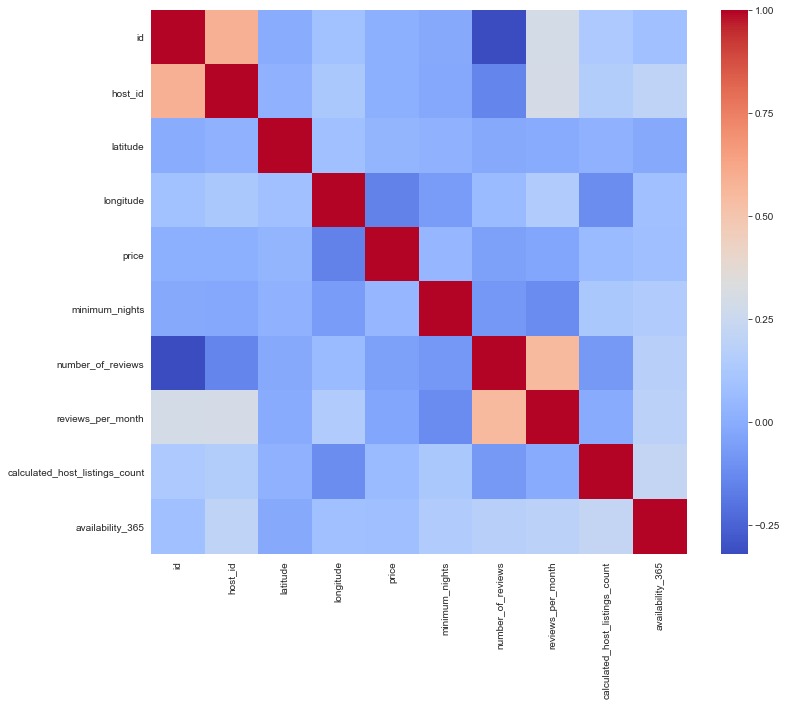

In [57]:

plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')

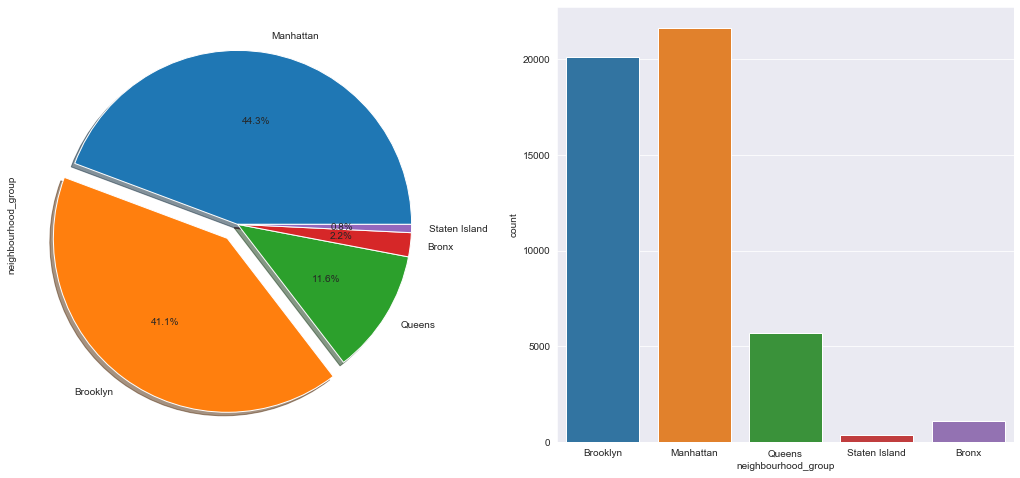

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,.1,0,0,0], autopct='%1.1f%%',ax=ax[0], shadow=True)
sns.countplot(df['neighbourhood_group'],ax=ax[1])
plt.show()

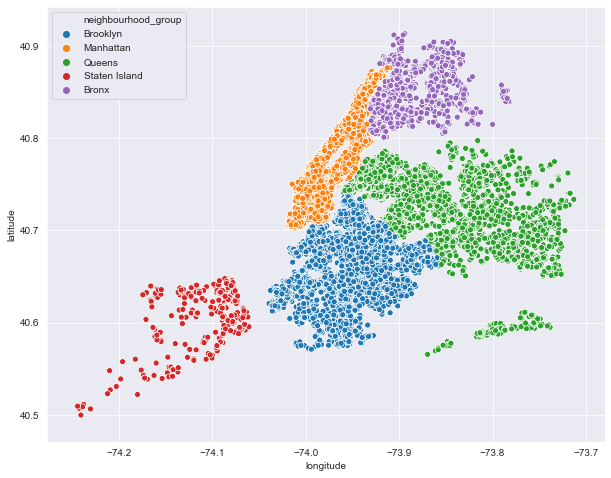

In [59]:
plt.subplots(figsize=(10,8))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group)
plt.ioff()

In [60]:
import folium
from folium.plugins import HeatMap
grad={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}
m=folium.Map([40.7128,74.0069],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(), radius=8, gradient=grad).add_to(m)
display(m)

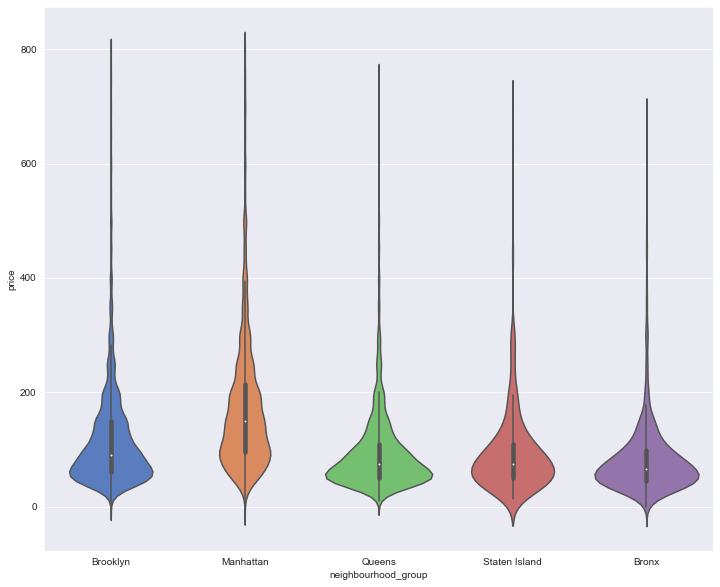

In [70]:
plt.subplots(figsize=(12,10))
airrbnb_price=df[df.price<800]
sns.violinplot('neighbourhood_group','price',data=airrbnb_price ,palette='muted', dodge=False)

In [75]:
import plotly as plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)


In [85]:
data=df[:5000].sort_values('price')
fig=px.bar(data, x='price', y='neighbourhood_group', color='availability_365', orientation='h',
          hover_data=['host_name','minimum_nights'], height=400)
fig.update_layout(xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Price',
                                                                       font=dict(family='Courier New, monospace',size=18, color='#7f7f7f'))),
                                    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Neighbourhood_group',
                                                                       font=dict(family='Courier New, monospace',size=18, color='#7f7f7f'))))
fig.show()

(0, 3000)

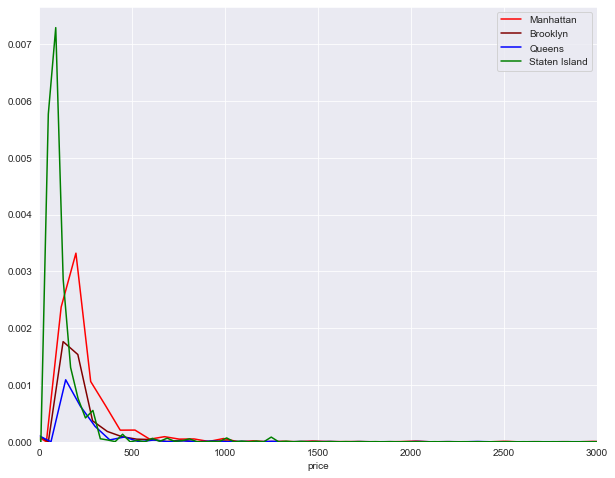

In [76]:
plt.subplots(figsize=(10,8))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price, color='red', hist=False, label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price, color='maroon', hist=False, label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price, color='blue', hist=False, label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price, color='green', hist=False, label='Staten Island')
plt.xlim(0,3000)

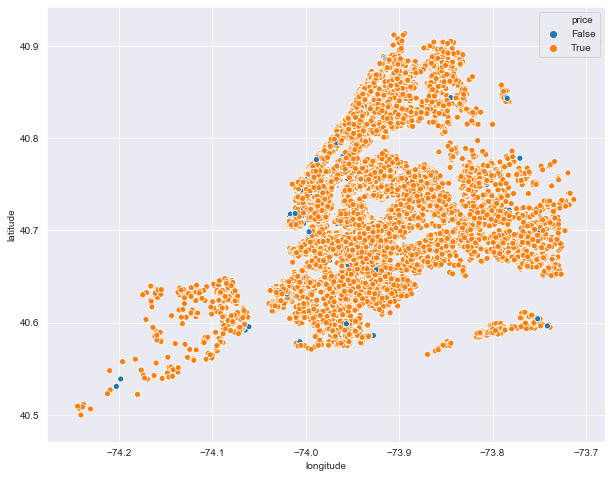

In [62]:
plt.subplots(figsize=(10,8))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.price<500)
plt.ioff()

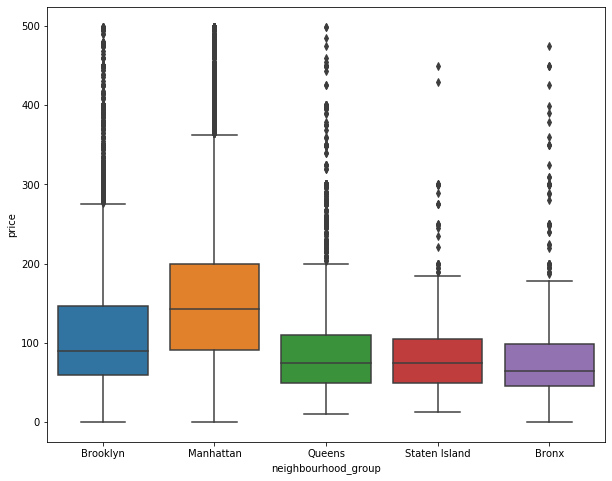

In [13]:
plt.subplots(figsize=(10,8))
box=df[df.price<500]
sns.boxplot(y='price', x='neighbourhood_group',data=box)

In [14]:
top_price_by_neighbourhood=df.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
top_price_by_neighbourhood

,neighbourhood,price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909
5,Prince's Bay,409.500000
6,Battery Park City,367.557143
7,Flatiron District,341.925000
8,Randall Manor,336.000000
9,NoHo,295.717949


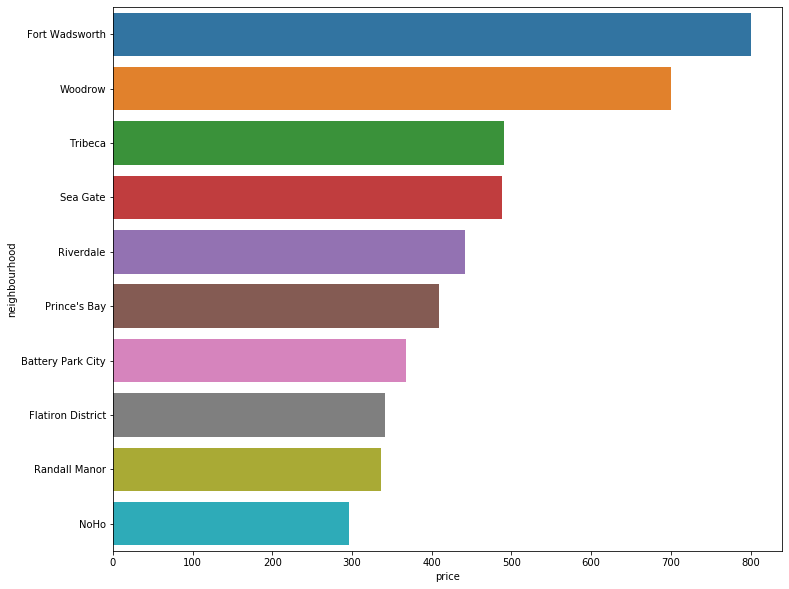

In [15]:
plt.subplots(figsize=(12,10))
sns.barplot(x='price', y='neighbourhood', data=top_price_by_neighbourhood.head(10))

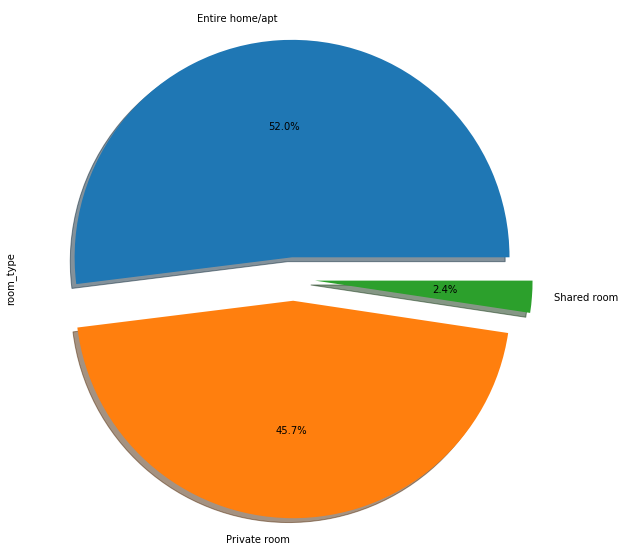

In [16]:
plt.subplots(figsize=(12,10))
df['room_type'].value_counts().plot.pie(explode=[0.1,.1,0.1], autopct='%1.1f%%', shadow=True)

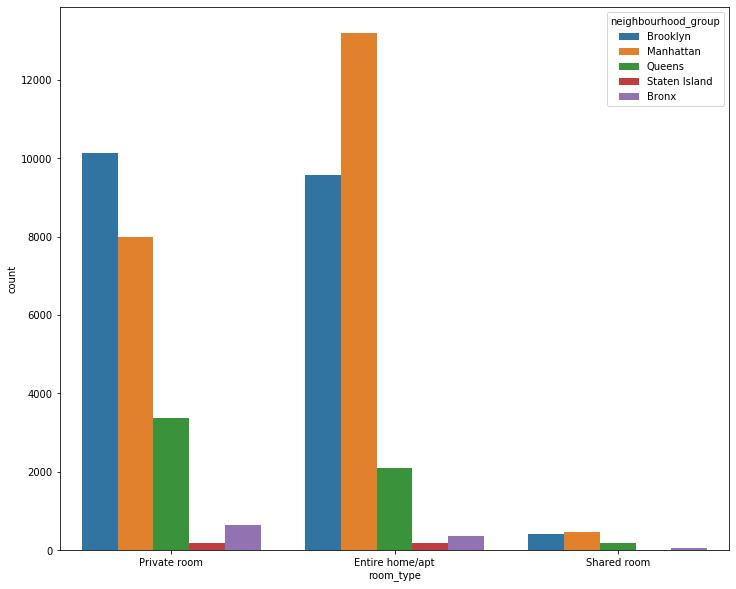

In [17]:
plt.subplots(figsize=(12,10))
sns.countplot(df.room_type, hue=df.neighbourhood_group)

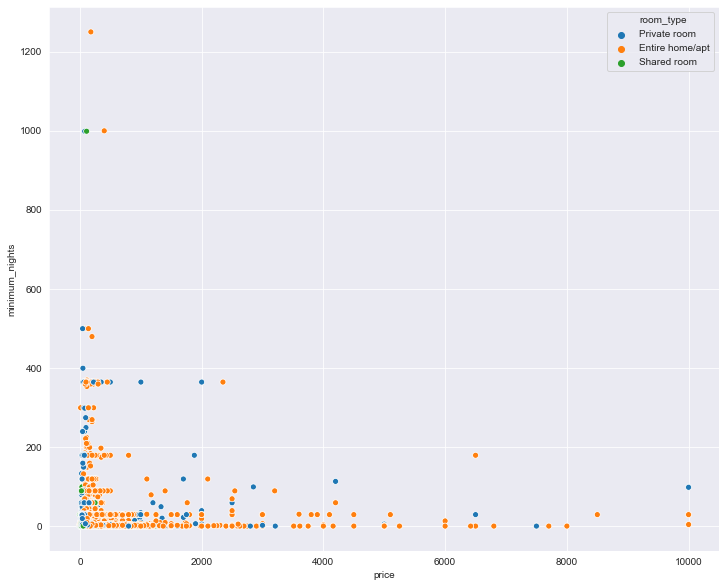

In [18]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,10))
sns.scatterplot(x=df.price, y=df.minimum_nights, hue=df.room_type)

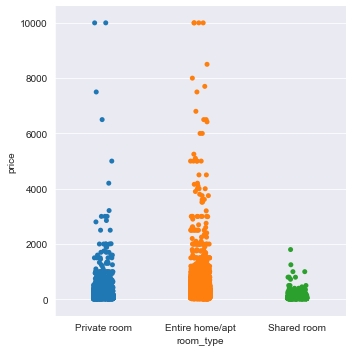

In [19]:
sns.set_style('darkgrid')
sns.catplot(x='room_type', y='price', data=df)

(-0.5, 399.5, 199.5, -0.5)

<Figure size 720x576 with 0 Axes>

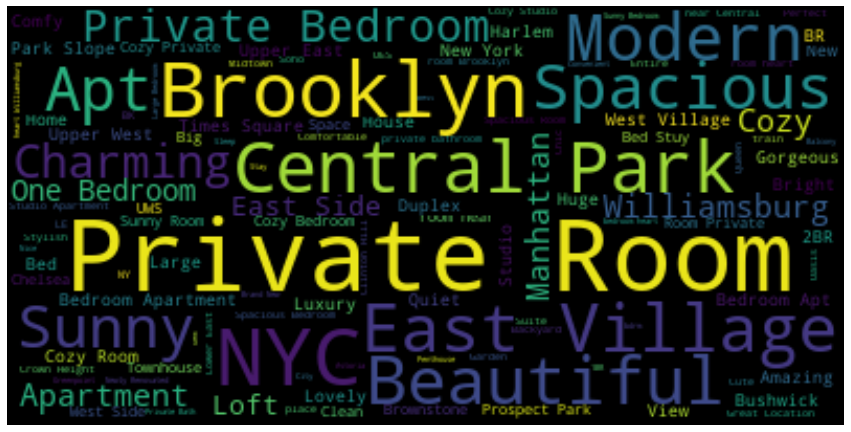

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
text=" ".join(str(each) for each in df.name)
wordcloud=WordCloud(max_words=200, background_color='black').generate(text)
plt.figure(figsize=(10,8))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [21]:
import numpy as np
from PIL import Image
new_mask=np.array(Image.open("newyork.png"))
new_mask
def tranform_format(val):
    if val is not 255:
        return 255
    else:
        return val
    

In [22]:
transfm_mask=np.ndarray((new_mask.shape[0], new_mask.shape[1]),np.int32)
for i in range(len(new_mask)):
    transfm_mask[i]=list(map(tranform_format, new_mask[i]))

In [23]:
transfm_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [24]:
_name_=[]

for name in df.name:
    _name_.append(name)
def split_name(name):
    spl=str(name).split()
    return spl
_name_for_count_=[]

for x in _name_:
    for word in split_name(x):
        word=word.lower()
        _name_for_count_.append(word)

In [25]:
from collections import Counter
_top_25_w= Counter(_name_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [26]:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

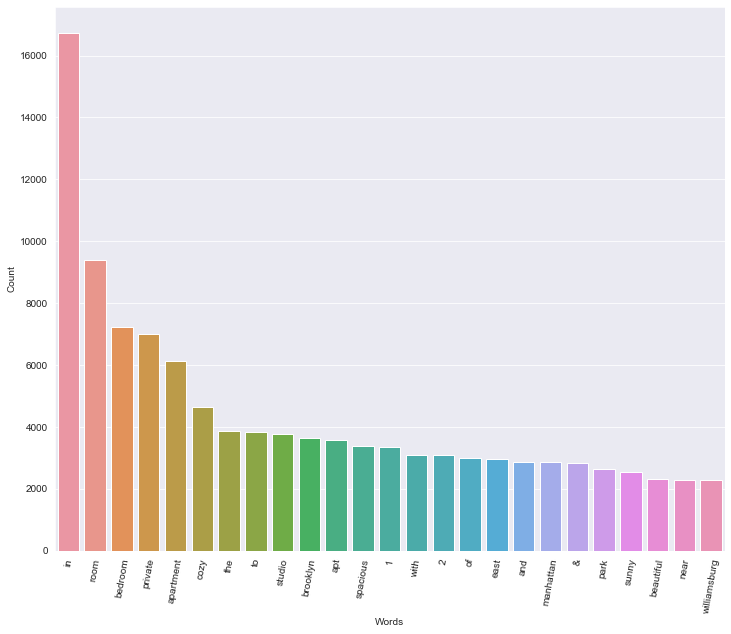

In [27]:
plt.subplots(figsize=(12,10))
viz=sns.barplot(x=sub_w.Words, y='Count', data=sub_w)
viz.set_xticklabels(viz.get_xticklabels(), rotation=80)

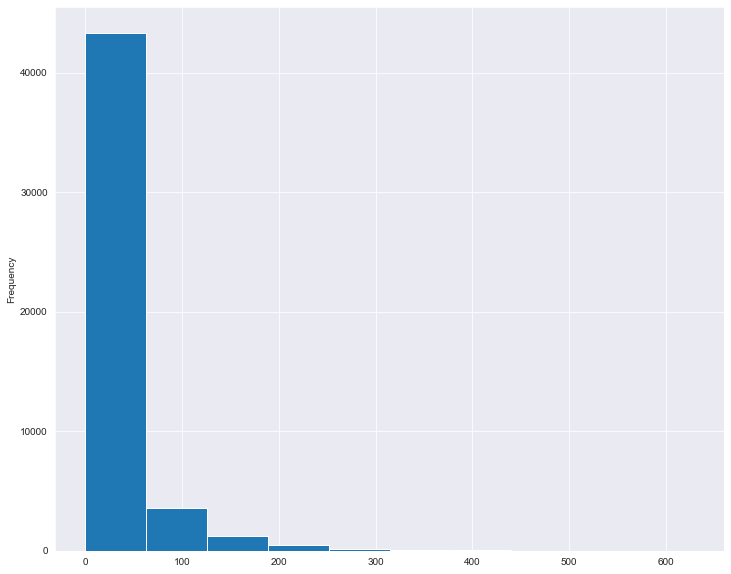

In [28]:
plt.subplots(figsize=(12,10))
df.number_of_reviews.plot(kind='hist')


In [29]:
df.drop(['name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)

In [30]:
df.reviews_per_month=df.reviews_per_month.replace(np.nan, 0)

In [31]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df.neighbourhood_group)
df.neighbourhood_group=le.transform(df.neighbourhood_group)

le.fit(df.neighbourhood)
df.neighbourhood=le.transform(df.neighbourhood)

le.fit(df.room_type)
df.room_type=le.transform(df.room_type)

df.sort_values(by='price', ascending=True, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


In [32]:
y=df.price
X=df.loc[:, df.columns != 'price']




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)


from sklearn.linear_model import LinearRegression
lm=LinearRegression()


In [33]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predict=lm.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
pd.DataFrame(lm.coef_,X.columns, columns=['coeff'])

,coeff
host_id,8.876169e-08
neighbourhood_group,1.147321e+01
neighbourhood,8.230596e-02
latitude,1.245291e+02
longitude,-6.262352e+02
room_type,-1.038175e+02
minimum_nights,5.963953e-02
number_of_reviews,-1.928655e-01
reviews_per_month,-5.158407e+00
calculated_host_listings_count,-1.260353e-01


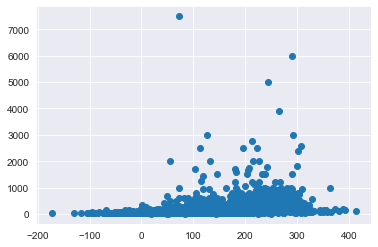

In [37]:
plt.scatter(predict,y_test, cmap='viridis')

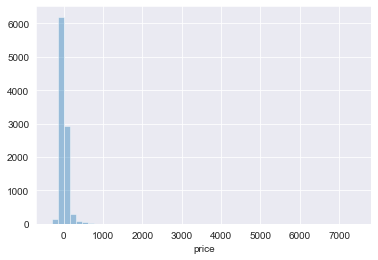

In [38]:
sns.distplot(y_test-predict, kde=False)

In [39]:
from sklearn import metrics

metrics.mean_absolute_error(y_test,predict)

np.sqrt(metrics.mean_squared_error(y_test, predict))

180.73409656936255

In [40]:
metrics.r2_score(y_test,predict)

0.11639576782323635

In [41]:
error_airbnb=pd.DataFrame({'Aactual': np.array(y_test).flatten(),
                          'Predicted': predict.flatten()}).head(20)
error_airbnb.head(20)

,Aactual,Predicted
0,400,135.112125
1,140,210.599057
2,195,176.222978
3,120,100.439183
4,88,88.545753
5,130,223.765029
6,235,228.356044
7,70,157.929920
8,225,219.969499
9,125,116.359776


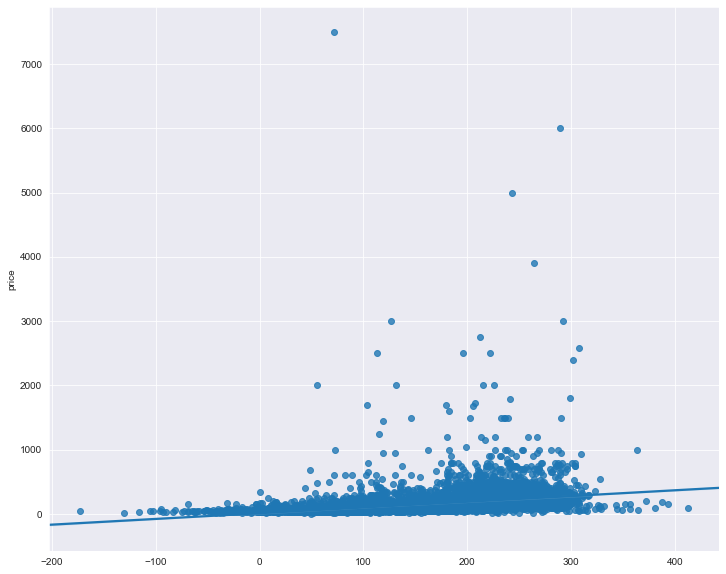

In [42]:
plt.subplots(figsize=(12,10))
sns.regplot(predict, y_test)

In [43]:
from sklearn.ensemble import GradientBoostingRegressor 
gb=GradientBoostingRegressor()

In [44]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
predictions=gb.predict(X_test)

In [46]:
metrics.median_absolute_error(y_test,predictions)

35.09813535306357

In [47]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

176.24775300771543

In [48]:
error_airbnb=pd.DataFrame({'Actual': np.array(y_test).flatten(),
                          'Predicted': predictions.flatten()})
error_airbnb.head(20)

,Actual,Predicted
0,400,135.198064
1,140,162.252068
2,195,160.202585
3,120,92.887260
4,88,76.627596
5,130,217.863189
6,235,268.216346
7,70,150.316905
8,225,310.484377
9,125,140.322092


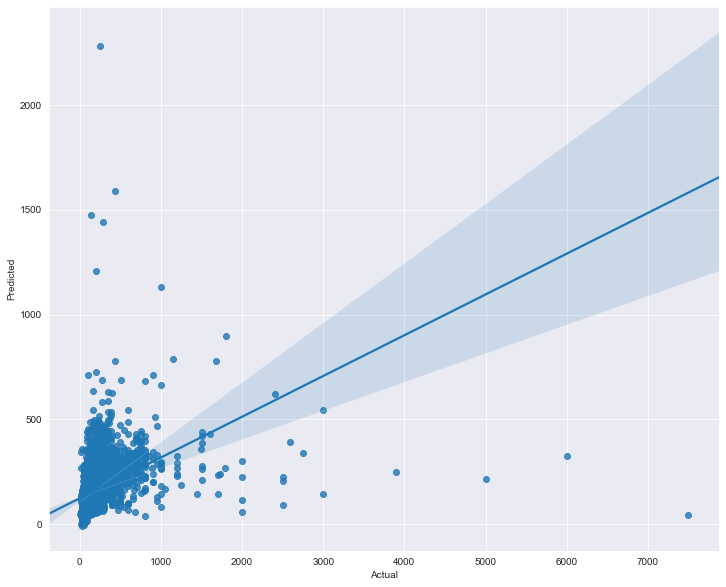

In [49]:
plt.subplots(figsize=(12,10))
sns.regplot(error_airbnb.Actual, error_airbnb.Predicted)

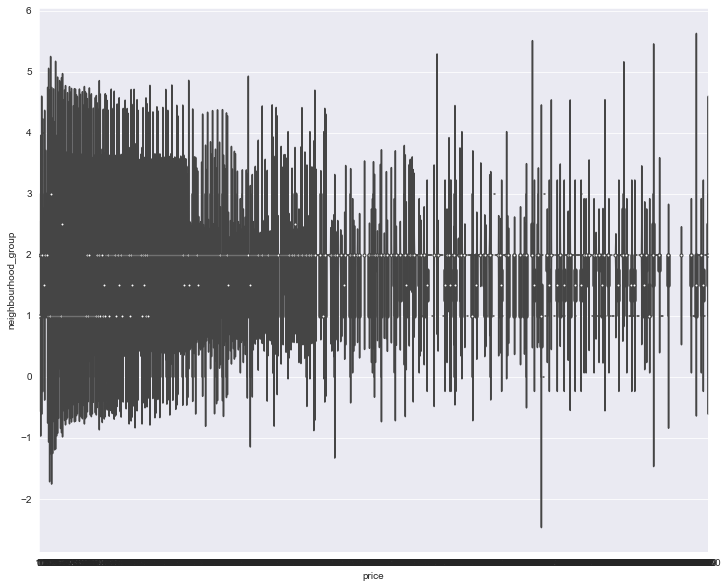